#Imbalanecd Data set
1. Under Sampling123
2. Over Sampling
3. Smote (Synthetic Minority Over Sampling Technique)

#Understanding the data set
CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.

Class Distribution

unacc
acc
good
v-good

#Importing Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [97]:
df = pd.read_csv('/content/car_evaluation.csv')

In [98]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [99]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,outcome
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good
1727,low,low,5,5,big,high,vgood


In [100]:
df.shape

(1728, 7)

In [102]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome'], dtype='object')

In [101]:
df.dtypes

buying      object
maint       object
doors        int64
persons      int64
lug_boot    object
safety      object
outcome     object
dtype: object

In [107]:
df.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.666667
std,1.118358,1.247580
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,5.000000
max,5.000000,5.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [109]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [110]:
df.duplicated().sum()

0

#Finding Unique values in the dataset for each feature

In [35]:
for col in list(df):
  print(col)
  print(df[col].unique())

buying
['vhigh' 'high' 'med' 'low']
maint
['vhigh' 'high' 'med' 'low']
doors
[2 3 4 5]
persons
[2 4 5]
lug_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']
outcome
['unacc' 'acc' 'vgood' 'good']


#Finding no. of Unique values in the dataset for each feature

In [104]:
for col in list(df):
  print(col, df[col].nunique(), sep='--->')
  print()

buying--->4

maint--->4

doors--->4

persons--->3

lug_boot--->3

safety--->3

outcome--->4



#Value Counts

In [103]:
for col in list(df):
  print(col)
  print(df[col].value_counts())

buying
vhigh    432
med      432
low      432
high     432
Name: buying, dtype: int64
maint
vhigh    432
med      432
low      432
high     432
Name: maint, dtype: int64
doors
5    432
4    432
3    432
2    432
Name: doors, dtype: int64
persons
5    576
4    576
2    576
Name: persons, dtype: int64
lug_boot
small    576
big      576
med      576
Name: lug_boot, dtype: int64
safety
med     576
low     576
high    576
Name: safety, dtype: int64
outcome
unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64


In [105]:
df.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

#EDA

In [106]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome'], dtype='object')

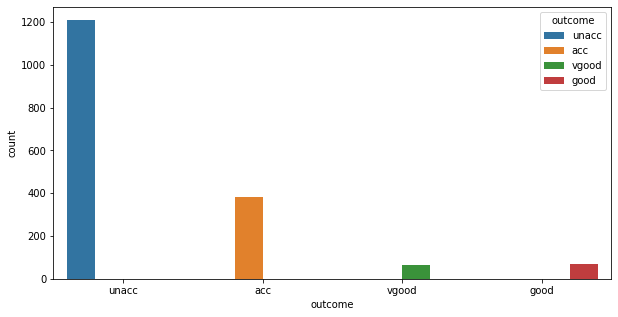

In [131]:
plt.figure(figsize = (10,5))
sb.countplot(data = df, x = 'outcome', hue = 'outcome')
plt.show()

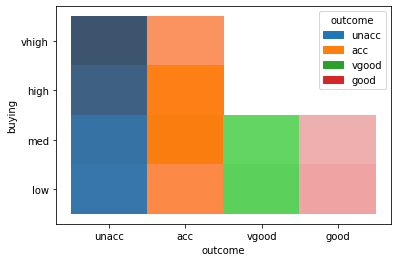

In [135]:
sb.histplot(data = df, x = 'outcome', y = 'buying', hue = 'outcome', )

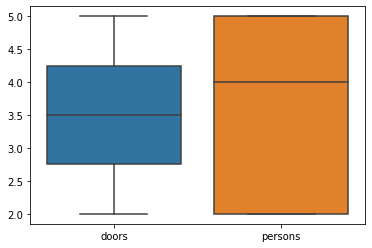

In [137]:
sb.boxplot(data = df)

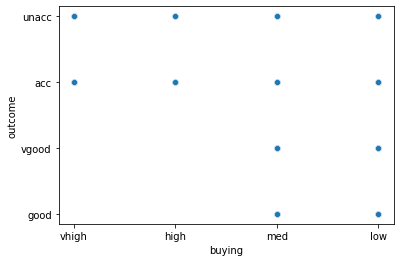

In [139]:
sb.scatterplot(data=df, x='buying',y ='outcome')

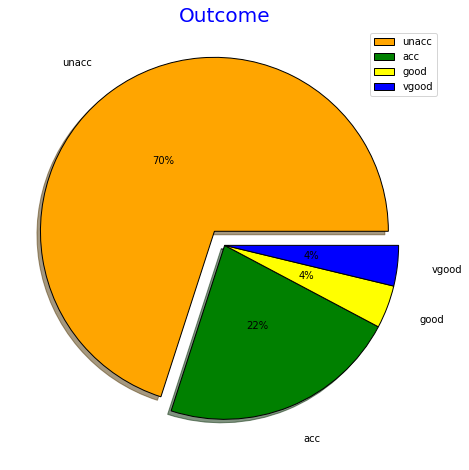

In [161]:
x_pie=df['outcome'].value_counts()
colors = ['orange', 'green', 'yellow', 'blue']
plt.figure(figsize=(8,8))
plt.pie(x_pie, labels=x_pie.index,
        wedgeprops={'edgecolor':'black'},
        autopct='%1.0f%%', 
        explode = [0.1,0,0,0], colors=colors,
        pctdistance=.5, labeldistance=1.2,shadow=True)
plt.title('Outcome', size = 20, color = 'blue')
plt.legend()
plt.show()

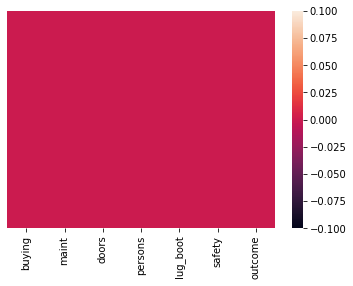

In [141]:
sb.heatmap(df.isnull(), yticklabels=False)

#Dividing Dataset

In [164]:
x = df.drop('outcome', axis = 1)
y = df.outcome

In [165]:
x.head(3)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high


In [167]:
y.head(3)

0    unacc
1    unacc
2    unacc
Name: outcome, dtype: object

#Applying Label Encoding for ordinal data on x

In [168]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
x. iloc[:, [0,1,4,5]] = x. iloc[ :, [0,1,4,5]].apply(labelenc.fit_transform)

In [50]:
x.head( )

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [172]:
print('Unique values after applying Label Encoding:')
for col in list(x):
  print(col)
  print(x[col].unique())

Unique values after applying Label Encoding:
buying
[3 0 2 1]
maint
[3 0 2 1]
doors
[2 3 4 5]
persons
[2 4 5]
lug_boot
[2 1 0]
safety
[1 2 0]


In [169]:
for col in list(x):
  print(col)
  print(x[col].value_counts())

buying
3    432
2    432
1    432
0    432
Name: buying, dtype: int64
maint
3    432
2    432
1    432
0    432
Name: maint, dtype: int64
doors
5    432
4    432
3    432
2    432
Name: doors, dtype: int64
persons
5    576
4    576
2    576
Name: persons, dtype: int64
lug_boot
2    576
1    576
0    576
Name: lug_boot, dtype: int64
safety
2    576
1    576
0    576
Name: safety, dtype: int64


In [175]:
y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

#Slpitting the data

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10, )

#Applying KNN Model without using imbalance data techniques


1.   The below line contains knn model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With out smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap

Accuracy: 0.9566473988439307
Confusion Matrix:
[[ 61   1   2   0]
 [  3   9   1   0]
 [  1   0 250   0]
 [  4   3   0  11]]
Heatmap on confusion matrix


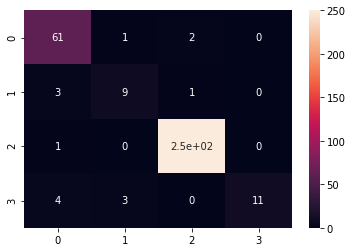

In [301]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred_knn = model.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))
print('Heatmap on confusion matrix')
sb.heatmap(confusion_matrix(y_test, y_pred_knn),annot = True)

In [302]:
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

Classification Report
              precision    recall  f1-score   support

         acc       0.88      0.95      0.92        64
        good       0.69      0.69      0.69        13
       unacc       0.99      1.00      0.99       251
       vgood       1.00      0.61      0.76        18

    accuracy                           0.96       346
   macro avg       0.89      0.81      0.84       346
weighted avg       0.96      0.96      0.95       346



#Crosstab

In [67]:
 pd.crosstab(y_test,y_pred_knn)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,61,1,2,0
good,3,9,1,0
unacc,1,0,250,0
vgood,4,3,0,11


In [81]:
df1 = pd.crosstab(y_test,y_pred_knn)
df1['sum'] = df1[df1.columns].apply(sum)

In [82]:
df1

col_0,acc,good,unacc,vgood,sum
outcome,,,,,
acc,61,1,2,0,69
good,3,9,1,0,13
unacc,1,0,250,0,253
vgood,4,3,0,11,11


#Applying Sampling Techniques
1.Under Sampling

In [186]:
import imblearn

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.9)
x_train_us,y_train_us = ns.fit_sample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_us)))

2. Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
x_train_os,y_train_os=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

3.SMOTE

In [202]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [211]:
x_train_smote, y_train_smote = smote.fit_sample(x_train.astype('float'), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [212]:
from collections import Counter
print('Before doing Smote:',Counter(y_train))
print('After doing Smote:',Counter(y_train_smote))

Before doing Smote: Counter({'unacc': 959, 'acc': 320, 'good': 56, 'vgood': 47})
After doing Smote: Counter({'unacc': 959, 'good': 959, 'vgood': 959, 'acc': 959})


#Applying model to the data which under gone for Smote

1.   The below line contains knn model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap

Accuracy: 0.9624277456647399
Confusion Matrix:
[[ 59   1   3   1]
 [  1  12   0   0]
 [  5   0 246   0]
 [  0   2   0  16]]
Heatmap on confusion matrix


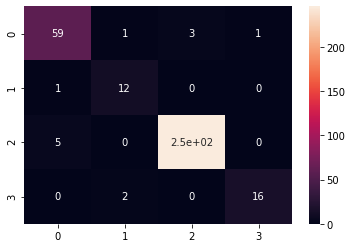

In [303]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train_smote, y_train_smote)
y_pred_knn_smote = model.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_pred_knn_smote))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn_smote))
print('Heatmap on confusion matrix')
sb.heatmap(confusion_matrix(y_test, y_pred_knn_smote), annot=True)

In [304]:
print('Classification Report')
print(classification_report(y_test, y_pred_knn_smote))

Classification Report
              precision    recall  f1-score   support

         acc       0.91      0.92      0.91        64
        good       0.80      0.92      0.86        13
       unacc       0.99      0.98      0.98       251
       vgood       0.94      0.89      0.91        18

    accuracy                           0.96       346
   macro avg       0.91      0.93      0.92       346
weighted avg       0.96      0.96      0.96       346



#Crosstab

In [323]:
print('Crosstab knn without smote')
print(pd.crosstab(y_test, y_pred_knn))
print('Crosstab knn with smote')
print(pd.crosstab(y_test, y_pred_knn_smote))

Crosstab knn without smote
col_0    acc  good  unacc  vgood
outcome                         
acc       61     1      2      0
good       3     9      1      0
unacc      1     0    250      0
vgood      4     3      0     11
Crosstab knn with smote
col_0    acc  good  unacc  vgood
outcome                         
acc       59     1      3      1
good       1    12      0      0
unacc      5     0    246      0
vgood      0     2      0     16


In [325]:
print('Before Smote the accuracy On KNN Model is:', acc_knn)
print('After Smote the accuracy On KNN Model is:', acc_knn_smote)

Before Smote the accuracy On KNN Model is: 0.9566473988439307
After Smote the accuracy On KNN Model is: 0.9624277456647399


#Random Forest Classifier:Model (without Smote)

1.   The below line contains random forest model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With out smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap



Accuracy: 0.9942196531791907
Confusion Matrix:
[[ 63   0   1   0]
 [  0  13   0   0]
 [  0   0 251   0]
 [  1   0   0  17]]
Heatmap on Confusion Matrix:


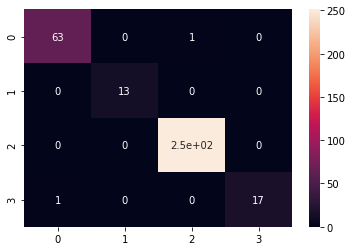

In [295]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(x_train,y_train)
y_pred_rand = random.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred_rand))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rand))
print('Heatmap on Confusion Matrix:')
sb.heatmap(confusion_matrix(y_test, y_pred_rand), annot=True)

In [290]:
print('Classification Report:')
print(classification_report(y_test, y_pred_rand))

Classification Report:
              precision    recall  f1-score   support

         acc       0.97      0.98      0.98        64
        good       0.93      1.00      0.96        13
       unacc       1.00      0.99      1.00       251
       vgood       1.00      1.00      1.00        18

    accuracy                           0.99       346
   macro avg       0.97      0.99      0.98       346
weighted avg       0.99      0.99      0.99       346



#Random Forest Classifier:Model (with Smote)

1.   The below line contains knn model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With  smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap



Accuracy: 0.9913294797687862
Confusion Matrix:
[[ 64   0   0   0]
 [  0  13   0   0]
 [  3   0 248   0]
 [  0   0   0  18]]
Heatmap for confution matrix:


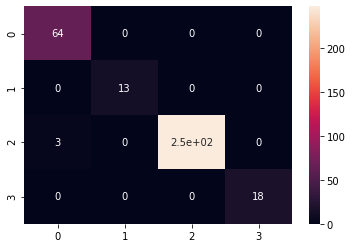

In [296]:
from sklearn.ensemble import RandomForestClassifier
random1 = RandomForestClassifier()
random1.fit(x_train_smote,y_train_smote)
y_pred_rand_smote = random1.predict(x_test)
print('Accuracy:',accuracy_score(y_test, y_pred_rand_smote))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rand_smote))
print('Heatmap for confution matrix:')
sb.heatmap(confusion_matrix(y_test, y_pred_rand_smote), annot=True)
plt.show()

In [286]:
print('Classifier Report:')
print(classification_report(y_test, y_pred_rand_smote))

Classifier Report:
              precision    recall  f1-score   support

         acc       0.95      0.98      0.97        64
        good       0.87      1.00      0.93        13
       unacc       1.00      0.99      0.99       251
       vgood       1.00      0.94      0.97        18

    accuracy                           0.99       346
   macro avg       0.96      0.98      0.97       346
weighted avg       0.99      0.99      0.99       346



In [321]:
print('Crosstab random forest classifier without smote')
print(pd.crosstab(y_test, y_pred_rand))
print('Crosstab random forest classifier with smote')
print(pd.crosstab(y_test, y_pred_rand_smote))

Crosstab random forest classifier without smote
col_0    acc  good  unacc  vgood
outcome                         
acc       63     0      1      0
good       0    13      0      0
unacc      0     0    251      0
vgood      1     0      0     17
Crosstab random forest classifier with smote
col_0    acc  good  unacc  vgood
outcome                         
acc       64     0      0      0
good       0    13      0      0
unacc      3     0    248      0
vgood      0     0      0     18


#Support Vector Classifier:Model (with out Smote)

1.   The below line contains svc model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With  out smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap

Accuracy: 0.8236994219653179
Confusion Matrix:
[[ 35   0  29   0]
 [ 10   0   3   0]
 [  6   0 245   0]
 [ 13   0   0   5]]
Heatmap on Confusion Matrix:


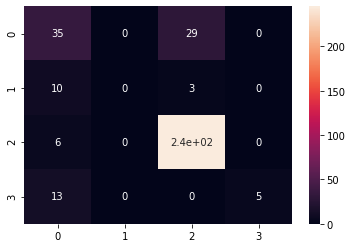

In [312]:
from sklearn.svm import  SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svc))
print('Heatmap on Confusion Matrix:')
sb.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True)

In [313]:
print('Classifier Report:')
print(classification_report(y_test, y_pred_svc))

Classifier Report:
              precision    recall  f1-score   support

         acc       0.55      0.55      0.55        64
        good       0.00      0.00      0.00        13
       unacc       0.88      0.98      0.93       251
       vgood       1.00      0.28      0.43        18

    accuracy                           0.82       346
   macro avg       0.61      0.45      0.48       346
weighted avg       0.79      0.82      0.80       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Support Vector Classifier:Model (with Smote)

1.   The below line contains svc model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap

Accuracy: 0.8641618497109826
Confusion Matrix:
[[ 58   5   0   1]
 [  0  13   0   0]
 [ 32   9 210   0]
 [  0   0   0  18]]
Heatmap on Confusion Matrix:


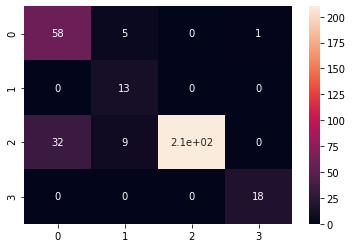

In [314]:
from sklearn.svm import  SVC
svc = SVC()
svc.fit(x_train_smote,y_train_smote)
y_pred_svc_smote = svc.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred_svc_smote))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svc_smote))
print('Heatmap on Confusion Matrix:')
sb.heatmap(confusion_matrix(y_test, y_pred_svc_smote), annot=True)

In [315]:
print('Classifier Report:')
print(classification_report(y_test, y_pred_svc_smote))

Classifier Report:
              precision    recall  f1-score   support

         acc       0.64      0.91      0.75        64
        good       0.48      1.00      0.65        13
       unacc       1.00      0.84      0.91       251
       vgood       0.95      1.00      0.97        18

    accuracy                           0.86       346
   macro avg       0.77      0.94      0.82       346
weighted avg       0.91      0.86      0.88       346



In [320]:
print('Crosstab SVC without smote')
print(pd.crosstab(y_test, y_pred_svc))
print('Crosstab SVC with smote')
print(pd.crosstab(y_test, y_pred_svc_smote))

Crosstab SVC without smote
col_0    acc  unacc  vgood
outcome                   
acc       35     29      0
good      10      3      0
unacc      6    245      0
vgood     13      0      5
Crosstab SVC with smote
col_0    acc  good  unacc  vgood
outcome                         
acc       58     5      0      1
good       0    13      0      0
unacc     32     9    210      0
vgood      0     0      0     18


#Extra Tree Classifier:Model (with out Smote)

1.   The below line contains Extra Tree Classifier model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With out smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap


Accuracy: 0.9884393063583815
Confusion Matrix:
[[ 62   1   0   1]
 [  1  12   0   0]
 [  0   0 251   0]
 [  0   1   0  17]]
Heatmap on Confusion Matrix:


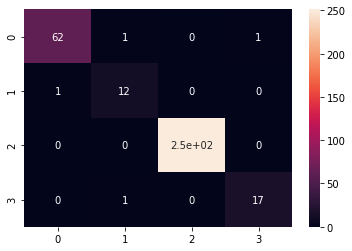

In [424]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra.fit(x_train,y_train)
y_pred_extra = extra.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred_extra))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_extra))
print('Heatmap on Confusion Matrix:')
sb.heatmap(confusion_matrix(y_test, y_pred_extra), annot=True)

In [425]:
print('Classifier Report:')
print(classification_report(y_test, y_pred_extra))

Classifier Report:
              precision    recall  f1-score   support

         acc       0.98      0.97      0.98        64
        good       0.86      0.92      0.89        13
       unacc       1.00      1.00      1.00       251
       vgood       0.94      0.94      0.94        18

    accuracy                           0.99       346
   macro avg       0.95      0.96      0.95       346
weighted avg       0.99      0.99      0.99       346



#Extra Tree Classifier:Model (with Smote)

1.   The below line contains Extra Tree Classifier model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap

Accuracy: 0.9884393063583815
Confusion Matrix:
[[ 62   1   0   1]
 [  1  12   0   0]
 [  1   0 250   0]
 [  0   0   0  18]]
Heatmap on Confusion Matrix:


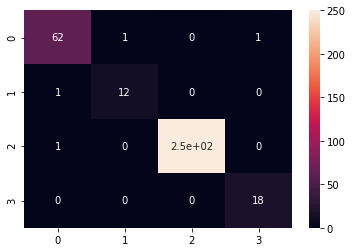

In [427]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra.fit(x_train_smote,y_train_smote)
y_pred_extra_smote = extra.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred_extra_smote))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_extra_smote))
print('Heatmap on Confusion Matrix:')
sb.heatmap(confusion_matrix(y_test, y_pred_extra_smote), annot=True)

In [428]:
print('Classifier Report:')
print(classification_report(y_test, y_pred_extra_smote))

Classifier Report:
              precision    recall  f1-score   support

         acc       0.97      0.97      0.97        64
        good       0.92      0.92      0.92        13
       unacc       1.00      1.00      1.00       251
       vgood       0.95      1.00      0.97        18

    accuracy                           0.99       346
   macro avg       0.96      0.97      0.97       346
weighted avg       0.99      0.99      0.99       346



In [429]:
print('Crosstab Extra Tree Classifier without smote')
print(pd.crosstab(y_test, y_pred_extra))
print('Crosstab Extra Tree Classifier with smote')
print(pd.crosstab(y_test, y_pred_extra_smote))

Crosstab Extra Tree Classifier without smote
col_0    acc  good  unacc  vgood
outcome                         
acc       62     1      0      1
good       1    12      0      0
unacc      0     0    251      0
vgood      0     1      0     17
Crosstab Extra Tree Classifier with smote
col_0    acc  good  unacc  vgood
outcome                         
acc       62     1      0      1
good       1    12      0      0
unacc      1     0    250      0
vgood      0     0      0     18


#Logistic Regression:Model (with Smote)

1.   The below line contains logistic model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap

Accuracy: 0.7109826589595376
Confusion Matrix:
[[ 16   0  47   1]
 [  3   0  10   0]
 [ 23   0 227   1]
 [  6   0   9   3]]
Heatmap on Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


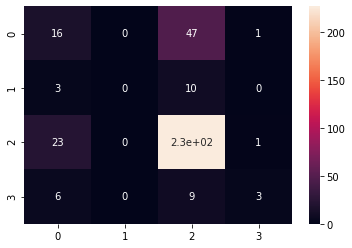

In [326]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(x_train,y_train)
y_pred_lrm = lrm.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred_lrm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lrm))
print('Heatmap on Confusion Matrix:')
sb.heatmap(confusion_matrix(y_test, y_pred_lrm), annot=True)

In [327]:
print('Classifier Report:')
print(classification_report(y_test, y_pred_lrm))

Classifier Report:
              precision    recall  f1-score   support

         acc       0.33      0.25      0.29        64
        good       0.00      0.00      0.00        13
       unacc       0.77      0.90      0.83       251
       vgood       0.60      0.17      0.26        18

    accuracy                           0.71       346
   macro avg       0.43      0.33      0.35       346
weighted avg       0.65      0.71      0.67       346



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Logistic Regression:Model (with Smote)

1.   The below line contains logistic model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap

Accuracy: 0.5375722543352601
Confusion Matrix:
[[  9  29  12  14]
 [  5   5   3   0]
 [ 45  44 155   7]
 [  1   0   0  17]]
Heatmap on Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


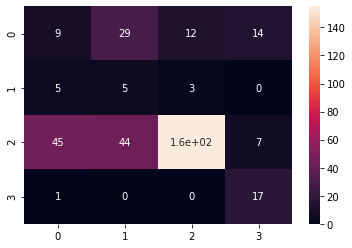

In [328]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(x_train_smote,y_train_smote)
y_pred_lrm_smote = lrm.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred_lrm_smote))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lrm_smote))
print('Heatmap on Confusion Matrix:')
sb.heatmap(confusion_matrix(y_test, y_pred_lrm_smote), annot=True)

In [329]:
print('Classifier Report:')
print(classification_report(y_test, y_pred_lrm_smote))

Classifier Report:
              precision    recall  f1-score   support

         acc       0.15      0.14      0.15        64
        good       0.06      0.38      0.11        13
       unacc       0.91      0.62      0.74       251
       vgood       0.45      0.94      0.61        18

    accuracy                           0.54       346
   macro avg       0.39      0.52      0.40       346
weighted avg       0.71      0.54      0.60       346



In [331]:
print('Crosstab LRM without smote')
print(pd.crosstab(y_test, y_pred_lrm))
print('Crosstab LRM with smote')
print(pd.crosstab(y_test, y_pred_lrm_smote))

Crosstab LRM without smote
col_0    acc  unacc  vgood
outcome                   
acc       16     47      1
good       3     10      0
unacc     23    227      1
vgood      6      9      3
Crosstab LRM with smote
col_0    acc  good  unacc  vgood
outcome                         
acc        9    29     12     14
good       5     5      3      0
unacc     45    44    155      7
vgood      1     0      0     17


#Logistic Regression:Model (with Smote & Hyper parameter tuning)

1.   The below line contains logistic model, accuracy, confusion matrix and classification report importing 
2.   Passing x_train and y_train (With smote technique) to the model
3.   Predicting the x_test value by our model and checking accuracy b/w y_test and predicted values on x_test
4. Checking confusion matrix, classifier report and heatmap
5. Here we found that LOgistic regression model doesn't get proprer accuracy so lets do hyper parameter tuning

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
lrm1 = LogisticRegression()

In [406]:
param={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=7,random_state=None,shuffle=False)

In [409]:
lrm2 =GridSearchCV(lrm1, param, cv=cv,scoring='f1_macro', n_jobs=-5)

In [ ]:
lrm2.fit(x_train_smote, y_train_smote)

In [411]:
lrm2.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-5,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

Accuracy: 0.5404624277456648
Confusion Matrix:
[[  9  29  12  14]
 [  5   6   2   0]
 [ 45  44 155   7]
 [  1   0   0  17]]
Heatmap on confusion Matrix


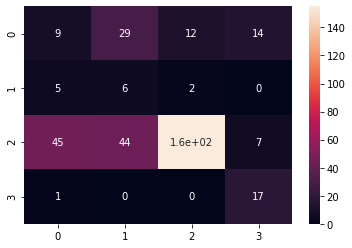

In [418]:
y_pred_lrm2_smote = lrm2.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_pred_lrm2_smote))
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_lrm2_smote))
print('Heatmap on confusion Matrix')
sb.heatmap(confusion_matrix(y_test, y_pred_lrm2_smote), annot = True)

In [416]:
print('Classification Report')
print(classification_report(y_test,y_pred_lrm2_smote))

Classification Report
              precision    recall  f1-score   support

         acc       0.15      0.14      0.15        64
        good       0.08      0.46      0.13        13
       unacc       0.92      0.62      0.74       251
       vgood       0.45      0.94      0.61        18

    accuracy                           0.54       346
   macro avg       0.40      0.54      0.41       346
weighted avg       0.72      0.54      0.60       346



Accuracy: 0.9855491329479769
Confusion Matrix:
[[ 62   1   0   1]
 [  1  12   0   0]
 [  2   0 249   0]
 [  0   0   0  18]]
Heatmap on Confusion Matrix:


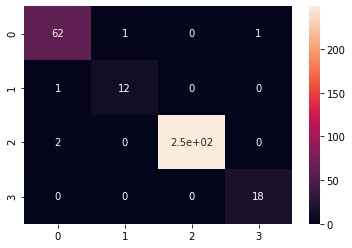